# Plotting time series using pyacs.gts.lib.plot
### Author: J.-M. Nocquet
### Date: 27/12/2019

In [1]:
import numpy as np
# import pyacs time series modules
import pyacs.gts.Gts as Gts
import pyacs.gts.Sgts as Sgts
# loads some time series as Gts objects
albh_pbo = Gts.Gts.read(tsfile='../data/formats/ALBH.pbo.final_igs14.pos',fmt='pos',verbose=True)

In [ ]:
# where plot will appear
# in the notebook as an interactive window
%matplotlib notebook
# in a separate interactive qt window
#%matplotlib qt
# in the notebook as a dead window
#%matplotlib inline

The following cell Plotting using all default values

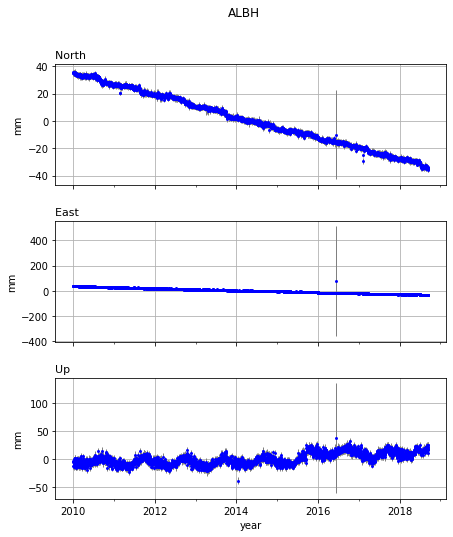

In [2]:
albh_pbo.plot()

This shows how most plot settings can be controled.

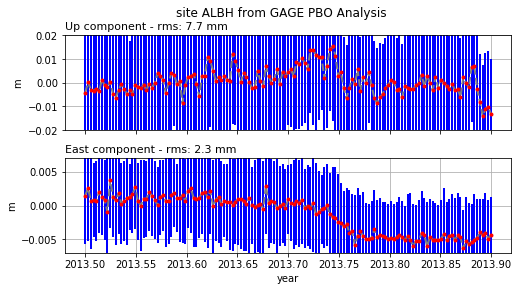

In [3]:
albh_pbo.plot(
              # figure size
              plot_size=(8,4), 
              # components to plot 
              lcomponent = ['U','E'],
              # unit
              unit='m',
              # general title for the plot
              title='site ALBH from GAGE PBO Analysis', 
              # info for each subplot
              info = [("Up component - rms: %.1lf mm" % ( np.std(albh_pbo.detrend().data ,axis=0)[3]*1.E3)),
                     ("East component - rms: %.1lf mm" % ( np.std(albh_pbo.detrend().data ,axis=0)[2]*1.E3))],
              # period for plot in decimal years
              date=[2013.5,2013.9],
              # y-axis bounds for East and North components
              yaxis=[-0.007,0.007],
              # y-axis bounds for Up component
              yupaxis=[-0.02,0.02],
              # rescale error bars
              error_scale=5.,
              # xlabel format, here asking for 2 digits to be displayed
              xlabel_fmt="%.2lf",
              # minor xticks
              xticks_minor_locator = 0.1, 
              # from now on, the key-words are from matplotlib.plot.errorbar
              # marker as circle
              marker='o',
              # size of the marker, set to zero to hide them
              markersize=4,
              # marker color
              markerfacecolor='red',
              # line style
              linestyle='--',
              # width of the line joining data
              linewidth=2,
              # line color
              color='grey',
              # errorbar color
              ecolor='blue',
              # errorbar width
              elinewidth = 2 ,
             )

plot can also superimpose several time series.
In the following example, we will plot original data as dots and smooth data as a red line.
For time series to be superimposed, the setting need to be defined through matplotlib.rcParams


-- Computing Vondrak filter for component North
-- Computing Vondrak filter for component East
-- Computing Vondrak filter for component Up


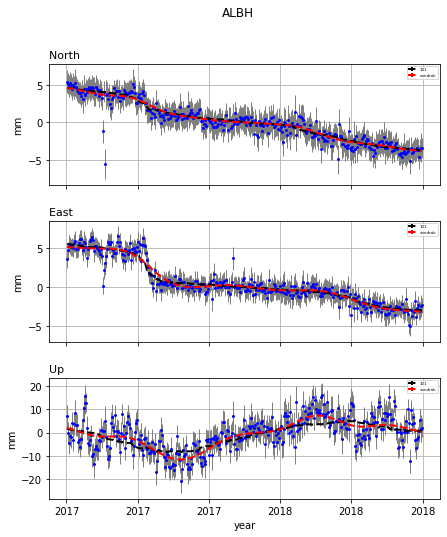

In [4]:
# import
import matplotlib as mpl
# filter the original time series
albh_filtered_101 = albh_pbo.median_filter(101)
albh_filtered_vondrak = albh_pbo.vondrak(fc=4)
# setting for the superimposed time series
mpl.rc('lines', linewidth=2, linestyle='--',marker=None,markersize=1)
# plot
albh_pbo.plot(superimposed=[albh_filtered_101,albh_filtered_vondrak], \
              date=[2017.,2018.],
              xticks_minor_locator=1, 
              label=['101','vondrak'],
              lcolor=['black','red'],
              legend=True)

Pyacs plot also handles several date formats 

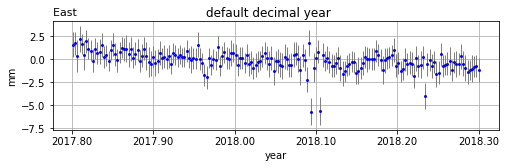

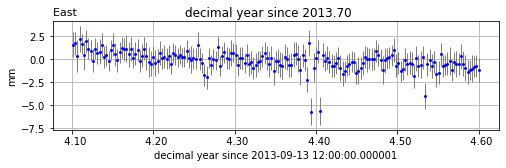

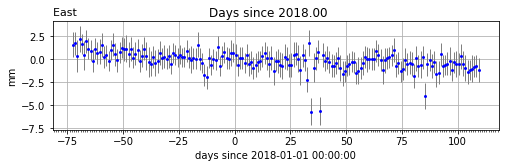

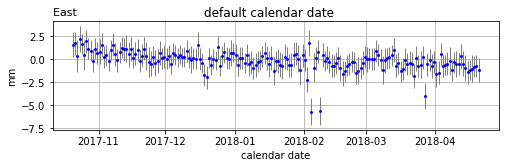

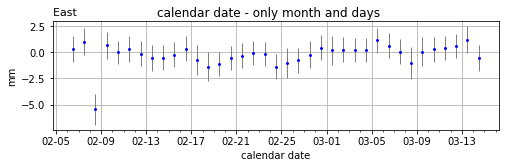

In [5]:
%matplotlib inline
albh_pbo.plot(plot_size=(8,2.), lcomponent = ['E'], date=[2017.8,2018.3], 
              title='default decimal year')
albh_pbo.plot(plot_size=(8,2.), lcomponent = ['E'], date=[2017.8,2018.3], 
              title='decimal year since 2013.70',date_ref=2013.70)
albh_pbo.plot(plot_size=(8,2.), lcomponent = ['E'], date=[2017.8,2018.3], 
              title='Days since 2018.00',date_unit='days',date_ref=2018.00)
albh_pbo.plot(plot_size=(8,2.), lcomponent = ['E'], date=[2017.8,2018.3], 
              title='default calendar date',date_unit='cal')
albh_pbo.plot(plot_size=(8,2.), lcomponent = ['E'], date=[2018.1,2018.2], 
              title='calendar date - only month and days',date_unit='cal', 
              xticks_minor_locator="%d",xlabel_fmt="%m-%d")